In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd '/content/gdrive/MyDrive/Scale불량'

/content/gdrive/MyDrive/Scale불량


## 목표 : 후판공정 scale 불량 데이터를 이용하여 scale 불량을 발생시키는 주요 원인 도출 및 개선 방안 수립 

### 데이터 전처리 
step1. 데이터 셋 확인 

In [137]:
import pandas as pd

df_raw = pd.read_csv('SCALE불량.csv', encoding='cp949')
df_raw.head(3)

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조


In [6]:
df_raw.shape

(720, 21)

In [7]:
df_raw.dtypes

PLATE_NO              object
ROLLING_DATE          object
SCALE                 object
SPEC                  object
STEEL_KIND            object
PT_THK               float64
PT_WDTH                int64
PT_LTH                 int64
PT_WGT                 int64
FUR_NO                object
FUR_NO_ROW             int64
FUR_HZ_TEMP            int64
FUR_HZ_TIME            int64
FUR_SZ_TEMP            int64
FUR_SZ_TIME            int64
FUR_TIME               int64
FUR_EXTEMP             int64
ROLLING_TEMP_T5        int64
HSB                   object
ROLLING_DESCALING      int64
WORK_GR               object
dtype: object

#### spep1-1 변수 확인   

##### -date 타입  
ROLLING_DATE : 작업시각  

##### -범주형 변수  
PLATE_NO : Plate Number     
*(목표변수)SCALE : Scale 불량여부  
SPEC : 제품 규격   
STEEL_KIND : 강종  
FUR_NO : 가열로 호기     
HSB : HBS 적용   
WORK_GR : 작업조 

##### -연속형 변수  
PT_THK : plate 두께  
PT_WDTH	: plate 폭   
PT_LTH : plate 길이  
PT_WGT : plate 중량  
FUR_NO_ROW : 가열로 작업 순번   
FUR_HZ_TEMP	: 가열로 가열대 온도    
FUR_HZ_TIME : 가열로 가열대 시간	
FUR_SZ_TEMP : 가열로 균열대 온도   	
FUR_SZ_TIME : 가열로 균열대 시간  	
FUR_TIME : 가열로 시간	  
FUR_EXTEMP : 추출 온도   	
ROLLING_TEMP_T5 : 압연 온도   
ROLLING_DESCALING : 압연 중 descaling 횟수  



###### step1-2. raw data 확인 

##### 단변수 분석

In [8]:
# 단변수 분석 
#=> 하나의 변수에 대한 기술 통계 확인 

df_raw['SCALE'].value_counts()

양품    489
불량    231
Name: SCALE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd5d2066d0>,
      dtype=object)

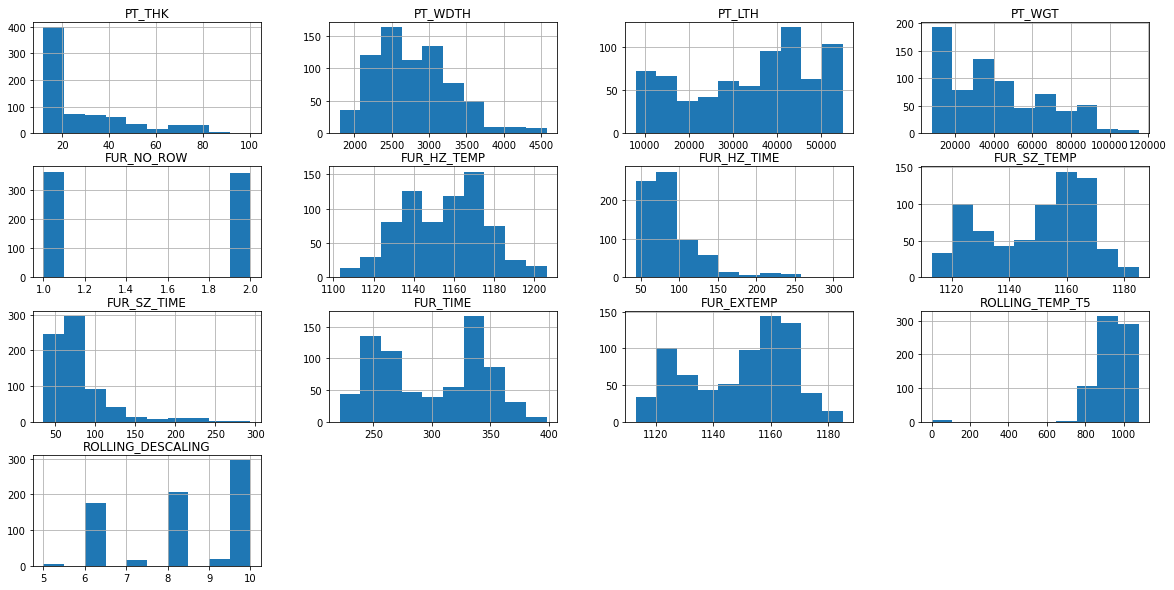

In [9]:
from matplotlib import pyplot as plt

# 숫자형 변수에 대해 histogram 생성하여 분포 확인 
df_raw.hist(figsize=(20,10))

In [138]:
import numpy as np

# SCALE 의 데이터 값 양품일경우 : 0, 불량일 경우 : 1 로 변경 

df_raw["SCALE"] = np.where(df_raw["SCALE"] == "양품", 0, 1)
df_raw["SCALE"].value_counts()

0    489
1    231
Name: SCALE, dtype: int64

In [139]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
# HSB 0, 1로 데이터 값 변경 
le.fit(df_raw["HSB"])
df_raw["HSB"] = le.transform(df_raw["HSB"])
# 적용 : 1, 미적용 : 0

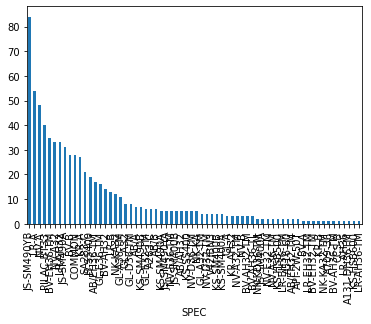

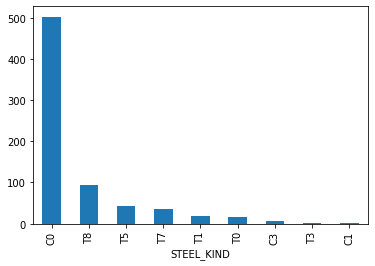

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)


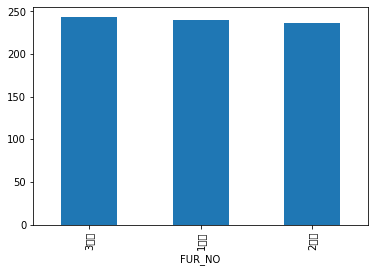

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)


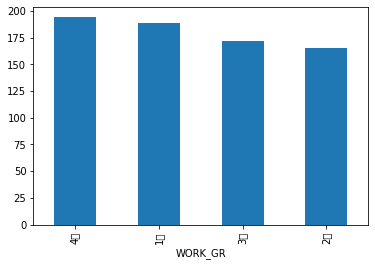

In [26]:
# 범주형 변수에 대해 bar chart 을 이용해 분포 확인

character_columns_list = ["SPEC","STEEL_KIND","FUR_NO","WORK_GR"]

for i in character_columns_list :
  df_count = df_raw[i].value_counts()
  df_count.plot.bar()
  plt.xlabel(i)
  plt.show()

In [61]:
# 범주형 변수에 대한 카테고리별 양품, 불량 개수 확인 

def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"],columns = data[var], normalize ="columns").round(3))

In [62]:
# 강종 
fun_print_crosstab(df_raw, "SPEC")

SPEC   A131-DH36TM  A283-C  A516-60  ...  PILAC-BT33  SA283-C  V42JBN3
SCALE                                ...                              
0                0       1        1  ...          38       11        3
1                1       5        1  ...           2       10        1

[2 rows x 66 columns]

SPEC   A131-DH36TM  A283-C  A516-60  ...  PILAC-BT33  SA283-C  V42JBN3
SCALE                                ...                              
0              0.0   0.167      0.5  ...        0.95    0.524     0.75
1              1.0   0.833      0.5  ...        0.05    0.476     0.25

[2 rows x 66 columns]


In [63]:
# 강종
fun_print_crosstab(df_raw, "STEEL_KIND")

#=> C0 강종은 다른 강종에 비해 상대적으로 높은 불량률을 보이고 있음 ; 조사할 필요 있음 

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8
SCALE                                          
0           291   0   6  14  16   2  41  29  90
1           212   1   1   2   2   0   2   6   5

STEEL_KIND     C0   C1     C3     T0     T1   T3     T5     T7     T8
SCALE                                                                
0           0.579  0.0  0.857  0.875  0.889  1.0  0.953  0.829  0.947
1           0.421  1.0  0.143  0.125  0.111  0.0  0.047  0.171  0.053


In [64]:
# 가열로 호기
fun_print_crosstab(df_raw, "FUR_NO")

FUR_NO  1호기  2호기  3호기
SCALE                
0       167  167  155
1        73   70   88

FUR_NO    1호기    2호기    3호기
SCALE                      
0       0.696  0.705  0.638
1       0.304  0.295  0.362


In [65]:
# 작업조 
fun_print_crosstab(df_raw, "WORK_GR")

WORK_GR   1조   2조   3조   4조
SCALE                      
0        122  120  118  129
1         67   45   54   65

WORK_GR     1조     2조     3조     4조
SCALE                              
0        0.646  0.727  0.686  0.665
1        0.354  0.273  0.314  0.335


In [14]:
# 연속형 변수에 대한 양품, 불량 분포 확인 

def fun_plot_hist(data, var):
    plt.hist(data[data['SCALE'] == 0][var], label = "good", alpha = 0.5)
    plt.hist(data[data['SCALE'] == 1][var], label = "bad", alpha = 0.5)
    plt.legend()

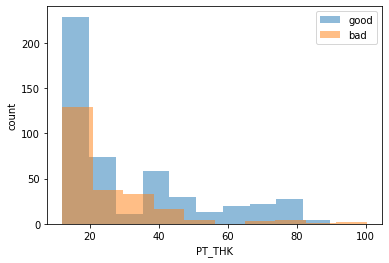

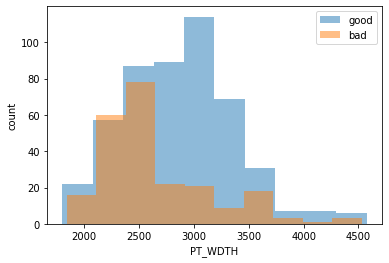

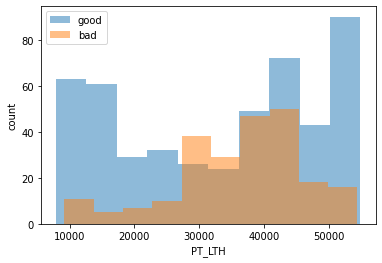

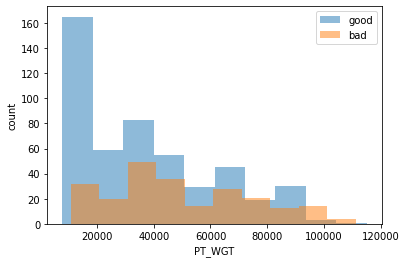

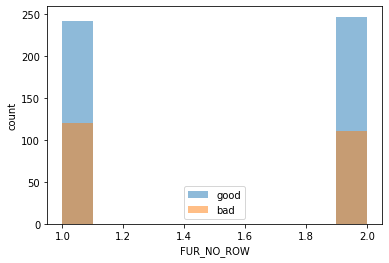

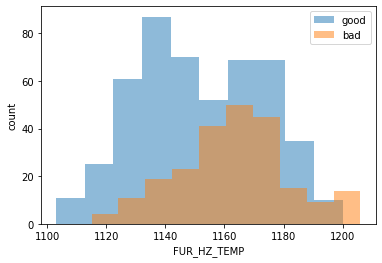

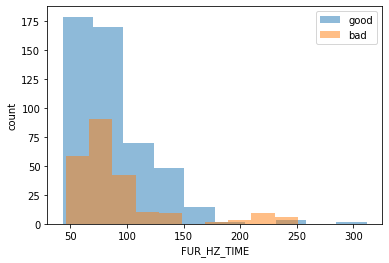

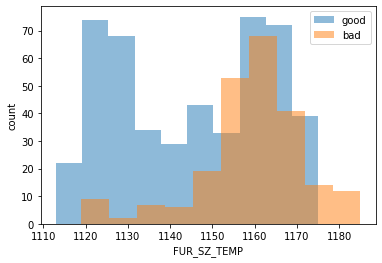

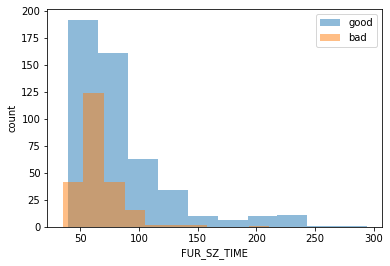

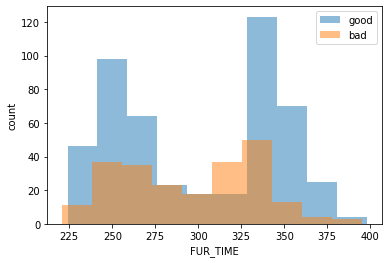

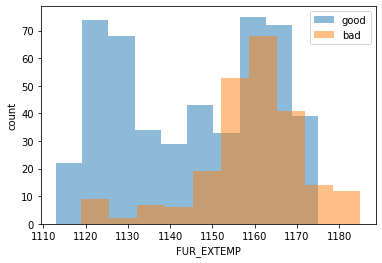

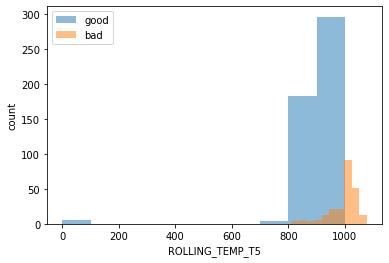

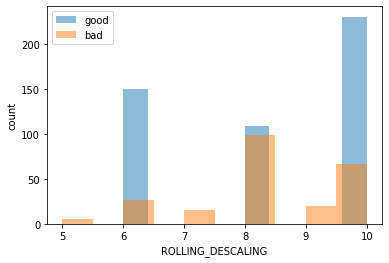

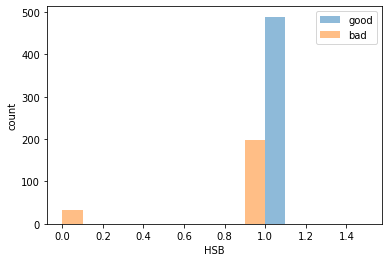

In [25]:
# 연속형 변수 목록 
numeric_columns_list = ["PT_THK","PT_WDTH","PT_LTH","PT_WGT","FUR_NO_ROW","FUR_HZ_TEMP","FUR_HZ_TIME","FUR_SZ_TEMP","FUR_SZ_TIME","FUR_TIME","FUR_EXTEMP","ROLLING_TEMP_T5","ROLLING_DESCALING","HSB"]

for i in numeric_columns_list :
  fun_plot_hist(df_raw,i)
  plt.xlabel(i)
  plt.ylabel("count")
  plt.show()

##### 이변수 분석

In [94]:
# 수치형 데이터간의 상관관계 확인 
corr = df_raw.corr()
corr

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
SCALE,1.000000,-0.124858,-0.206021,0.100475,0.218741,-0.022960,0.247670,0.056139,0.374809,-0.240137,-0.049214,0.374809,0.384967,-0.318880,-0.006955
PT_THK,-0.124858,1.000000,-0.313151,-0.862618,-0.397391,-0.002530,-0.523926,0.160110,-0.694770,0.113171,0.413009,-0.694770,-0.373976,-0.017628,-0.836631
PT_WDTH,-0.206021,-0.313151,1.000000,0.119726,0.031009,0.006727,0.180024,-0.119175,0.227296,0.022627,-0.393200,0.227296,-0.021807,-0.041914,0.337540
PT_LTH,0.100475,-0.862618,0.119726,1.000000,0.451815,-0.021185,0.473111,-0.077392,0.645402,-0.070225,-0.251950,0.645402,0.312762,-0.018222,0.809280
PT_WGT,0.218741,-0.397391,0.031009,0.451815,1.000000,-0.022241,0.153331,0.010491,0.359513,-0.190922,-0.057776,0.359513,0.263216,0.022630,0.238986
FUR_NO_ROW,-0.022960,-0.002530,0.006727,-0.021185,-0.022241,1.000000,0.004753,-0.015791,0.009228,0.049045,0.016053,0.009228,-0.004372,-0.021142,0.018219
FUR_HZ_TEMP,0.247670,-0.523926,0.180024,0.473111,0.153331,0.004753,1.000000,-0.114395,0.772907,-0.222141,-0.348223,0.772907,0.265310,-0.035614,0.470899
FUR_HZ_TIME,0.056139,0.160110,-0.119175,-0.077392,0.010491,-0.015791,-0.114395,1.000000,-0.203401,0.177922,0.473137,-0.203401,0.011609,0.008544,-0.137742
FUR_SZ_TEMP,0.374809,-0.694770,0.227296,0.645402,0.359513,0.009228,0.772907,-0.203401,1.000000,-0.450652,-0.477177,1.000000,0.452297,-0.038579,0.648646
FUR_SZ_TIME,-0.240137,0.113171,0.022627,-0.070225,-0.190922,0.049045,-0.222141,0.177922,-0.450652,1.000000,0.443176,-0.450652,-0.207358,-0.007574,-0.105667


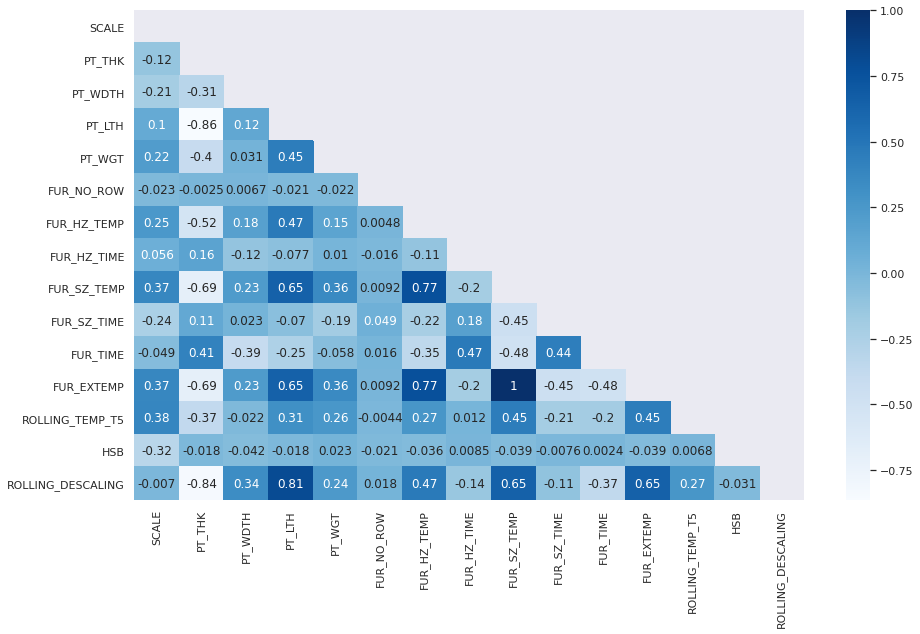

In [95]:
#이변수 분석
#=>변수 2개간의 관계 분석
import seaborn as sns

# 상관 관계 계수 시각화 
sns.set(rc = {'figure.figsize':(15,9)})

mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask) # 숫자 넣어주기 ; annot=True, 절반만 나오게 하기 ; mask 

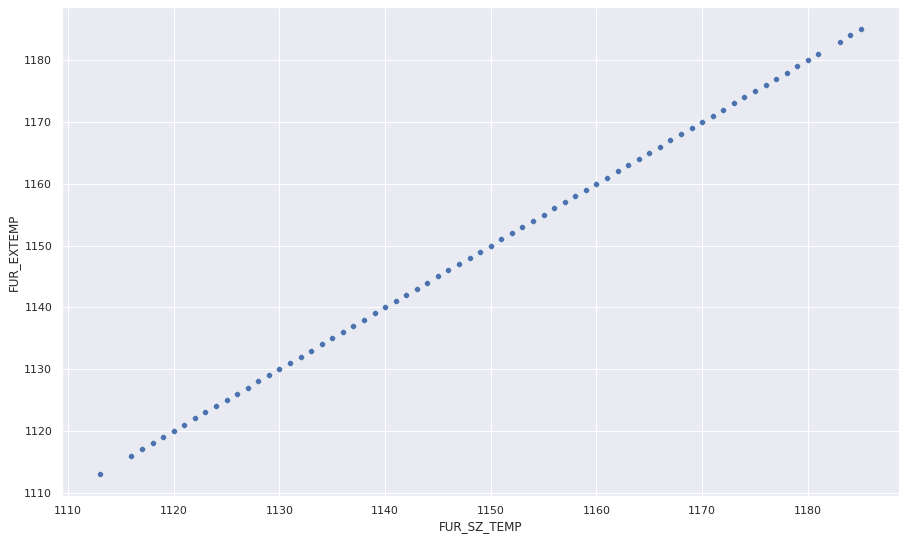

In [96]:
# 두 변수간의 상관관계가 1이어서 scatterplot을 이용하여 분포를 살펴봄
sns.scatterplot(data=df_raw, x="FUR_SZ_TEMP",y="FUR_EXTEMP")
# => 두 변수 FUR_SZ_TEMP, FUR_EXTEMP 중 결측치가 많은 값을 제외하기로 함 


# 회귀선 그리기 
# sns.lmplot(data=df_raw, x="FUR_SZ_TEMP",y="FUR_EXTEMP", hue="SCALE", col ="SCALE")


# 두개의 독립변수간에 상관관계가 매우 커서, 즉 한 변수를 알면 자동적으로 다른 변수를 알 수 있을 때에는 
# 다변량 분석이라도 이 두개의 독립변수가 종속변수에 미치는 영향을 따로 분리해서 산출할 수는 없다. 
#=>‘다중 공선성(multicollinearity)'.

# 다중공선성 확인 지표 : 분산 팽창계수 (VIF)
## VIF = 1/(1-R^2) 의 값이 5이상이면 다중공선성이 존재한다고 할 수 있음!!!  
# 결정계수 (R^2) = (상관계수)^2  

#=> 다중 공선성이 있는 변수(=상관성이 높은 변수)들 처리 방법 
# 1. 그 변수를 모델에서 제외한다.
##=> 두 변수 중 결측지가 더 많은 변수 제외하기 
# 2.“and/or" 조합을 이용한다.
# 3. 척도(scale)를 만든다.
##=> 두 변수를 종합하는 새로운 변수를 만듦 

# 다중공선성 참고 : http://www.snu-dhpm.ac.kr/pds/files/Relationship%20of%20independent%20variables%20to%20one%20another_%EB%B0%95%EC%9E%AC%ED%98%84.pdf 

In [140]:
# 결측치 확인 
print(df_raw["FUR_SZ_TEMP"].isnull().sum())
print(df_raw["FUR_EXTEMP"].isnull().sum())

# => 둘다 결측치가 0 이므로 FUR_SZ_TEMP 변수를 삭제 하기러 함 

0
0


In [141]:
# 다중공선성 존재하는 두 변수 중 FUR_SZ_TEMP 삭제 
df_raw.drop(['FUR_SZ_TEMP'], axis=1, inplace=True)

In [142]:
df_raw.shape

#=> 21-> 20 column 하나 제거 

(720, 20)

### 데이터 전처리
step2. 결측값 처리

In [100]:
# df_raw 데이터의 결측값 확인 

df_raw.isnull().sum()
#=> 결측값 없음 

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

### 데이터 전처리
step3. 이상값 처리

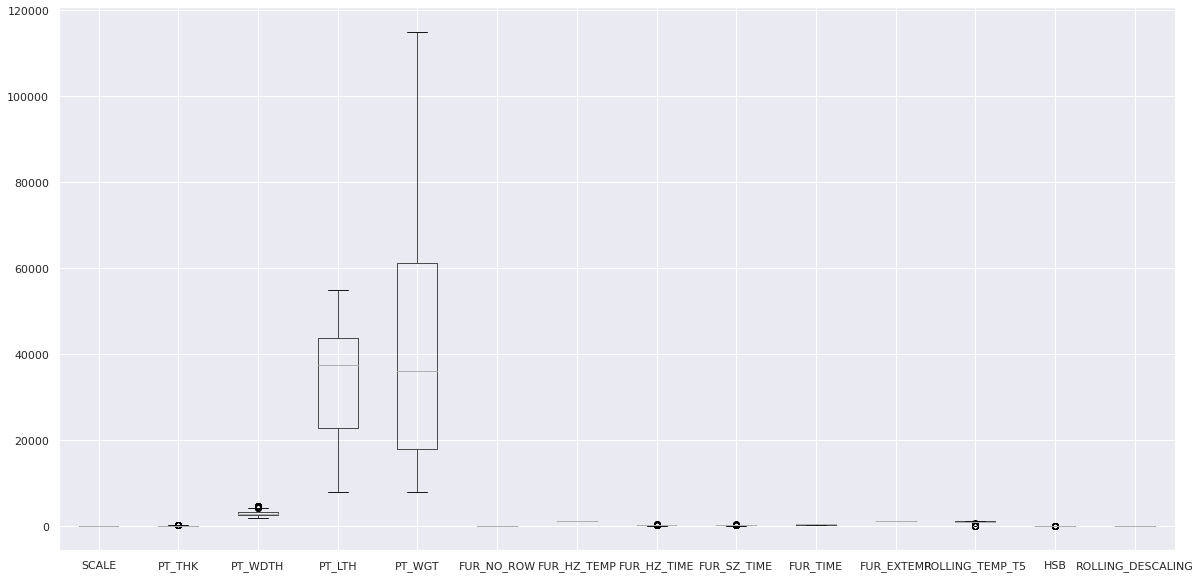

In [101]:
df_raw.boxplot(figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


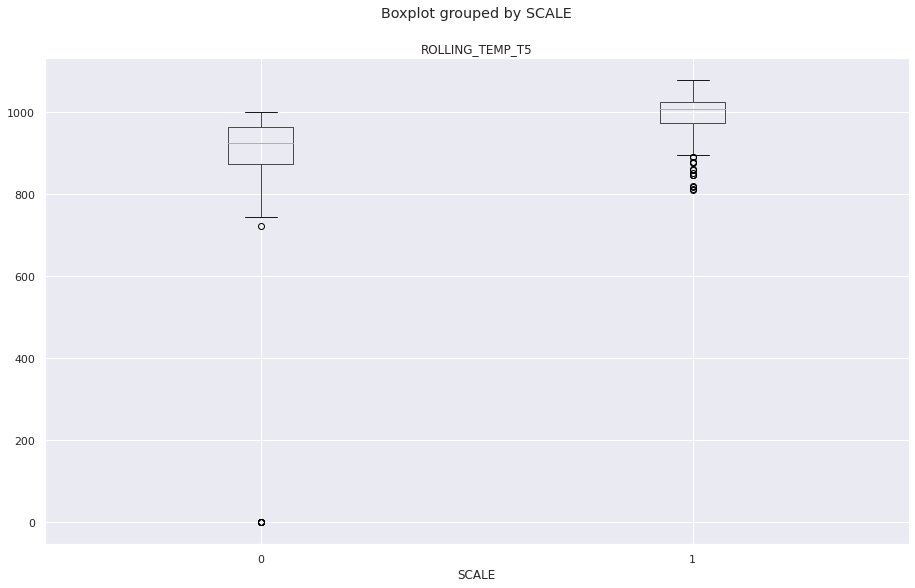

In [102]:
# ROLLING_TEMP_T5 에 대해 boxplot 그려봄 
df_raw.boxplot(column = "ROLLING_TEMP_T5", by = "SCALE")

# => 0 이 존재함 ;  ROLLING_TEMP_T5 은 압연온도이기에 0 이 존재할 수 없음 ; 완벽한 이상치임 => 제거 

In [143]:
# ROLLING_TEMP_T5 가 600 이상인 데이터만 남김 
 
df_raw = df_raw[df_raw.ROLLING_TEMP_T5>600]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


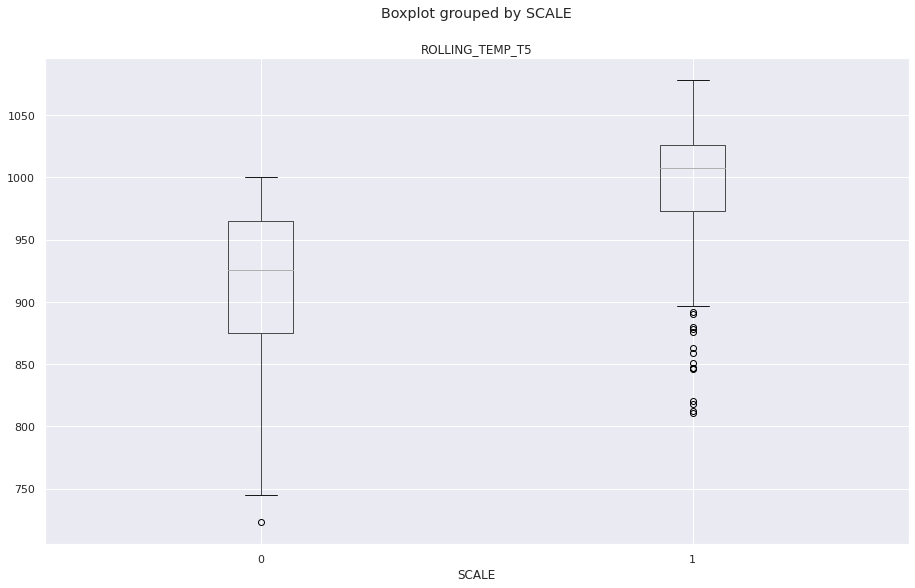

In [144]:
# 다시 ROLLING_TEMP_T5 컬럼의 분포에 대해 boxplot 찍어봄 
df_raw.boxplot(column = "ROLLING_TEMP_T5", by = "SCALE")

In [ ]:
# 위 데이터 셋 확인 시 시각화 했던 자료를 토대로 이상치를 찾아냄 

# ROLLING_DATE : 작업시각 => 이상치 x 

# 범주형 변수  
#PLATE_NO : Plate Number => 이상치 x    
# *(목표변수)SCALE : Scale 불량여부 => 이상치 x 
# SPEC : 제품 규격 => 이상치 x  
# STEEL_KIND : 강종  => 이상치 x 
# FUR_NO : 가열로 호기 => 이상치 x     
# HSB : HBS 적용   => 이상치 x
# WORK_GR : 작업조 => 이상치 x

# 연속형 변수  
#PT_THK : plate 두께  
# PT_WDTH	: plate 폭   
# PT_LTH : plate 길이  
# PT_WGT : plate 중량  
# FUR_NO_ROW : 가열로 작업 순번   
# FUR_HZ_TEMP	: 가열로 가열대 온도    
# FUR_HZ_TIME : 가열로 가열대 시간
# FUR_SZ_TIME : 가열로 균열대 시간  	
# FUR_TIME : 가열로 시간	  
# FUR_EXTEMP : 추출 온도   	
# ROLLING_TEMP_T5 : 압연 온도  => 이상치 (0) 제거 
# ROLLING_DESCALING : 압연 중 descaling 횟수  

In [145]:
# 이상치 제거후 df_raw를 보니 행이 714개인데 인덱스는 719으로 끝나는 것을 볼 수 있다. 
df_raw

#=> 인덱스 수정하기 

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,59,282,1133,934,1,8,2조
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,53,283,1135,937,1,8,2조
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,55,282,1121,889,1,8,3조
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,68,316,1127,885,1,8,3조
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,48,314,1128,873,1,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,1,NK-KA,C0,20.14,3580,38639,21870,3호기,1,1172,72,62,245,1164,1005,1,8,2조
716,PB563503,2008-08-02:13:35:02,0,NV-A32,C0,15.08,3212,48233,18340,2호기,1,1150,61,61,238,1169,947,1,10,1조
717,PB563504,2008-08-02:14:40:00,0,NV-A32,C0,16.60,3441,43688,19590,2호기,2,1169,65,77,247,1163,948,1,10,4조
718,PB563505,2008-08-02:13:35:19,0,LR-A,C0,15.59,3363,48740,80240,3호기,2,1179,86,45,243,1163,940,1,10,2조


In [146]:
# df_raw 의 인덱스 리셋

df_raw.reset_index(drop=True, inplace =True)
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,59,282,1133,934,1,8,2조
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,53,283,1135,937,1,8,2조
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,55,282,1121,889,1,8,3조
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,68,316,1127,885,1,8,3조
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,48,314,1128,873,1,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,PB563502,2008-08-02:13:35:36,1,NK-KA,C0,20.14,3580,38639,21870,3호기,1,1172,72,62,245,1164,1005,1,8,2조
710,PB563503,2008-08-02:13:35:02,0,NV-A32,C0,15.08,3212,48233,18340,2호기,1,1150,61,61,238,1169,947,1,10,1조
711,PB563504,2008-08-02:14:40:00,0,NV-A32,C0,16.60,3441,43688,19590,2호기,2,1169,65,77,247,1163,948,1,10,4조
712,PB563505,2008-08-02:13:35:19,0,LR-A,C0,15.59,3363,48740,80240,3호기,2,1179,86,45,243,1163,940,1,10,2조


### 데이터 전처리
step4. Feature Engineering

In [ ]:
# 변수 제거 유무 판단 

# ROLLING_DATE : 작업시각 => 시작시각은 큰 의미 없음 => 제거 

# 범주형 변수  
#PLATE_NO : Plate Number => 고유 번호 이므로 큰 의미 없음 => 제거 
# *(목표변수)SCALE : Scale 불량여부 
# SPEC : 제품 규격  => 제품 규격 큰 의미 없음 => 제거 
# STEEL_KIND : 강종  => 아까 C0 강종에서 불량률이 높았음 => 중요함  
# FUR_NO : 가열로 호기    
# HSB : HBS 적용   
# WORK_GR : 작업조 

# 연속형 변수  
#PT_THK : plate 두께  
# PT_WDTH	: plate 폭   
# PT_LTH : plate 길이  
# PT_WGT : plate 중량  
# FUR_NO_ROW : 가열로 작업 순번   
# FUR_HZ_TEMP	: 가열로 가열대 온도    
# FUR_HZ_TIME : 가열로 가열대 시간
# FUR_SZ_TIME : 가열로 균열대 시간  	
# FUR_TIME : 가열로 시간	  
# FUR_EXTEMP : 추출 온도   	
# ROLLING_TEMP_T5 : 압연 온도  => 이상치 (0) 제거 
# ROLLING_DESCALING : 압연 중 descaling 횟수  

In [147]:
# 일단 불필요한 변수 ROLLING_DATE, PLATE_NO, SPEC 삭제 
df_raw.drop(['ROLLING_DATE'], axis=1, inplace=True)
df_raw.drop(['PLATE_NO'], axis=1, inplace=True)
df_raw.drop(['SPEC'], axis=1, inplace=True)

In [148]:
df_raw.shape

#=> 20-> 17 column 세개 제거 

(714, 17)

In [149]:
df_raw.head(3)

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,T1,32.25,3707,15109,14180,1호기,1,1144,116,59,282,1133,934,1,8,2조
1,0,T1,32.25,3707,15109,14180,1호기,2,1144,122,53,283,1135,937,1,8,2조
2,0,T8,33.27,3619,19181,18130,2호기,1,1129,116,55,282,1121,889,1,8,3조


In [159]:
# FUR_NO와 WORK_GR 컬럼 '호기', '조' 떼고 저장 
for i in range(714) :
  df_raw['FUR_NO'][i] = df_raw['FUR_NO'][i][0]
  df_raw['WORK_GR'][i] = df_raw['WORK_GR'][i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,T1,32.25,3707,15109,14180,1,1,1144,116,59,282,1133,934,1,8,2
1,0,T1,32.25,3707,15109,14180,1,2,1144,122,53,283,1135,937,1,8,2
2,0,T8,33.27,3619,19181,18130,2,1,1129,116,55,282,1121,889,1,8,3
3,0,T8,33.27,3619,19181,18130,2,2,1152,125,68,316,1127,885,1,8,3
4,0,T8,38.33,3098,13334,12430,3,1,1140,134,48,314,1128,873,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,1,C0,20.14,3580,38639,21870,3,1,1172,72,62,245,1164,1005,1,8,2
710,0,C0,15.08,3212,48233,18340,2,1,1150,61,61,238,1169,947,1,10,1
711,0,C0,16.60,3441,43688,19590,2,2,1169,65,77,247,1163,948,1,10,4
712,0,C0,15.59,3363,48740,80240,3,2,1179,86,45,243,1163,940,1,10,2


In [163]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              714 non-null    int64  
 1   STEEL_KIND         714 non-null    object 
 2   PT_THK             714 non-null    float64
 3   PT_WDTH            714 non-null    int64  
 4   PT_LTH             714 non-null    int64  
 5   PT_WGT             714 non-null    int64  
 6   FUR_NO             714 non-null    object 
 7   FUR_NO_ROW         714 non-null    int64  
 8   FUR_HZ_TEMP        714 non-null    int64  
 9   FUR_HZ_TIME        714 non-null    int64  
 10  FUR_SZ_TIME        714 non-null    int64  
 11  FUR_TIME           714 non-null    int64  
 12  FUR_EXTEMP         714 non-null    int64  
 13  ROLLING_TEMP_T5    714 non-null    int64  
 14  HSB                714 non-null    int64  
 15  ROLLING_DESCALING  714 non-null    int64  
 16  WORK_GR            714 non

In [160]:
# 독립, 종속 변수 나누기 

df_y = df_raw['SCALE']
df_x = df_raw.drop(["SCALE"], axis = 1, inplace = False)

In [161]:
# 머신러닝을 할 때 기계가 이해할 수 있도록 모든 데이터를 수치로 변환해주는 전처리 작업이 필수적이다
# 수치형 데이터로만 변환을 하게 되면 서로 간의 관계성이 생기게 되므로 가변수화 작업이 필요!!! 
# => pandas의  get_dummies함수 이용
df_x_dummy = pd.get_dummies(df_x)
df_x_dummy.head()

# STEEL_KIND, FUR_NO, WORK_GR 이 object 변수이었는데, get_dummies함수를 통해서 0, 1 값으로 변경된 것을 볼수있음
# 참고 : https://devuna.tistory.com/67

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,STEEL_KIND_C0,STEEL_KIND_C1,STEEL_KIND_C3,STEEL_KIND_T0,STEEL_KIND_T1,STEEL_KIND_T3,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1,FUR_NO_2,FUR_NO_3,WORK_GR_1,WORK_GR_2,WORK_GR_3,WORK_GR_4
0,32.25,3707,15109,14180,1,1144,116,59,282,1133,934,1,8,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,32.25,3707,15109,14180,2,1144,122,53,283,1135,937,1,8,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,33.27,3619,19181,18130,1,1129,116,55,282,1121,889,1,8,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3,33.27,3619,19181,18130,2,1152,125,68,316,1127,885,1,8,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,38.33,3098,13334,12430,1,1140,134,48,314,1128,873,1,8,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0


In [179]:
# train, test set => 0.7:0.3 으로 분할 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x_dummy, df_y, test_size = 0.3, random_state = 1234)

print("train data x size : {}".format(x_train.shape))
print("train data y size : {}".format(y_train.shape))
print("test data x size : {}".format(x_test.shape))
print("test data y size : {}".format(y_test.shape))

train data x size : (499, 29)
train data y size : (499,)
test data x size : (215, 29)
test data y size : (215,)


### 모델링
다양한 머신러닝 모델로 scale 불량 예측

In [180]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 평가하고자 하는 머신러닝 model들을 담을 빈리스트 준비  
models = []

# 머신러닝 모델 추가 
models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear",C=0.2)))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Ranom Forest:",RandomForestClassifier(n_estimators=5)))
models.append(("eXtreme Gradient Boost:",XGBClassifier()))

print('Models appended')

Models appended


In [181]:
# models 리스트 출력 
print(models)

[('Logistic Regression:', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('Naive Bayes:', GaussianNB(priors=None, var_smoothing=1e-09)), ('K-Nearest Neighbour:', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')), ('Decision Tree:', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, pre

In [182]:
# 모델명, 예측값 담을 빈리스트 
names = []
results = []

for name,model in models:
    # 교차검증
    kfold = KFold(n_splits=5, random_state=3)
    cv_result = cross_val_score(model, x_train, y_train, cv = kfold, scoring = "accuracy")
    
    names.append(name)
    results.append(cv_result)

print("=== 모델별 예측 정확도 ===") 

for i in range(len(names)):
    # 모델명과 예측정확도 평균의 퍼센트 값으로 출력 
    print(names[i],results[i].mean()*100)

# => xgboost, decision tree, random forest 순으로 정확도가 높은 것을 볼 수 있음 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

=== 모델별 예측 정확도 ===
Logistic Regression: 82.35959595959595
Naive Bayes: 67.94545454545455
K-Nearest Neighbour: 71.54545454545455
Decision Tree: 95.78585858585859
Support Vector Machine-linear: 81.74949494949495
Support Vector Machine-rbf: 67.93131313131313
Ranom Forest: 92.17575757575757
eXtreme Gradient Boost: 96.98989898989898


### 모델링 
1. 의사결정나무

In [184]:
# 모델 생성 

#export_graphviz: 나무구조 생성및 저장
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [187]:
tree_uncustomized = DTC(random_state = 1234)
tree_uncustomized.fit(x_train, y_train)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(x_train,y_train)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(x_test,y_test)))

#=> model 은 train 데이터에 과대적합 

Score on training set: 1.000
Score on test set: 0.958


In [188]:
# 현재 생성된 모델 옵션 확인 
tree_uncustomized

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [189]:
# model parameter 조정 
# max_depth: 최대깊이 변경에 따른 모델 성능

# train, test 정확도 결과 저장용
train_accuracy = []
test_accuracy =[]
# max_depth :최대 깊이 변경 ; para_depth : 1,2,3,...,10
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DTC(max_depth = v_max_depth, random_state= 1234)
    tree.fit(x_train, y_train)
    train_accuracy.append(tree.score(x_train, y_train))
    test_accuracy.append(tree.score(x_test, y_test))

# 데이터 테이블로 저장 
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.890,0.888
1,2,0.938,0.921
2,3,0.966,0.953
3,4,0.976,0.953
4,5,0.978,0.953
5,6,0.978,0.953
6,7,0.982,0.953
7,8,0.984,0.953
8,9,0.984,0.958
9,10,0.990,0.940


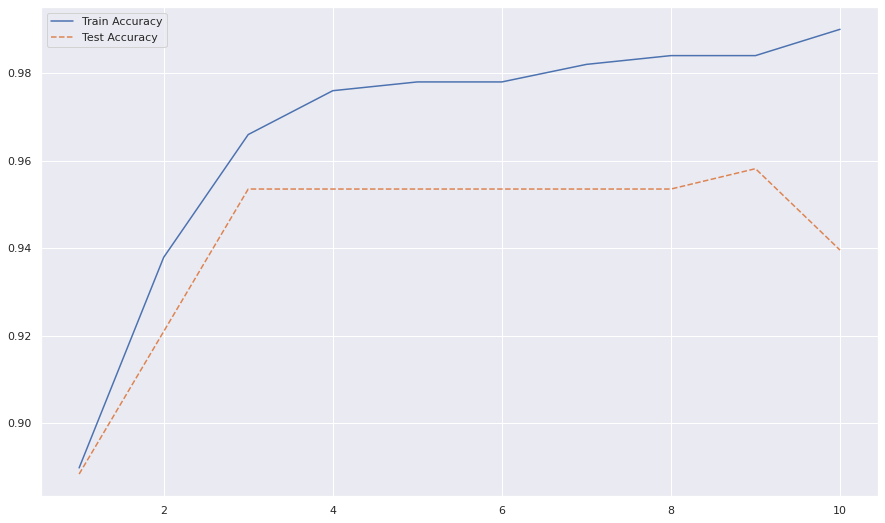

In [190]:
# 모델 정확도 그래프로 확인
plt.plot(para_depth, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle ="--", label = "Test Accuracy")
plt.legend()

#=> 최대 깊이 증가에 따라 모델의 정확도는 증가함
#=> train, test 데이터의 성능 변화를 고려하여 3 선택 

In [199]:
# model parameter 조정 
# min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

# train, test 정확도 결과 저장용
train_accuracy = []
test_accuracy =[]
# min_samples_split :분리 노드의 최소 자료 수 변경 ; para_split : 2,3,...,29
para_split = [n_split for n_split in range(2,30)]

for v_min_samples_split in para_split:
    tree = DTC(random_state = 1234, max_depth = 3, min_samples_split = v_min_samples_split)
    tree.fit(x_train,y_train)
    train_accuracy.append(tree.score(x_train,y_train))
    test_accuracy.append(tree.score(x_test,y_test))

# 데이터 테이블로 저장 
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesLeaf"] = para_split
df_accuracy_split["TrainScore"] = train_accuracy
df_accuracy_split["TestScore"] = test_accuracy

# 모델 정확도 확인 
df_accuracy_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.966,0.953
1,3,0.966,0.953
2,4,0.966,0.953
3,5,0.966,0.953
4,6,0.966,0.953
5,7,0.966,0.953
6,8,0.966,0.953
7,9,0.966,0.953
8,10,0.966,0.953
9,11,0.966,0.953


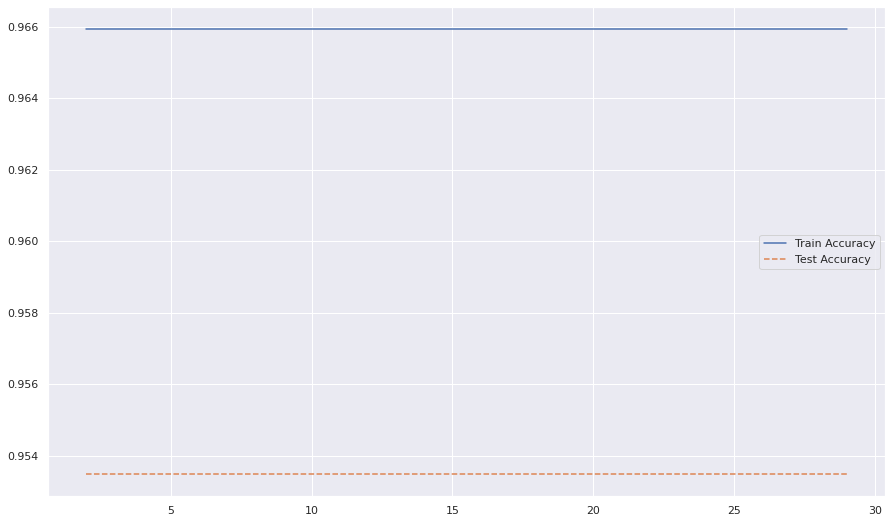

In [200]:
plt.plot(para_split, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle ="--", label = "Test Accuracy")
plt.legend()

# => 분리 노드의 최소 자료 수에 모델의 정확도는 변함이 없다 
#=> 그렇다면 그냥 20 선택 

In [201]:
# model parameter 조정 
# min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능 

# train, test 정확도 결과 저장용
train_accuracy = []
test_accuracy =[]
# min_samples_leaf : 잎사귀 노드 최소 자료 수 제한 (para_leaf : 2,4,6,8,...20)
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DTC(random_state = 1234, min_samples_leaf = v_min_samples_leaf, max_depth=4)
    tree.fit(x_train, y_train)
    train_accuracy.append(tree.score(x_train, y_train))
    test_accuracy.append(tree.score(x_test, y_test))

# 데이터 테이블로 저장 
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_accuracy
df_score_leaf["TestScore"] = test_accuracy

# 모델 정확도 확인 
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.976,0.953
1,4,0.976,0.953
2,6,0.966,0.953
3,8,0.966,0.953
4,10,0.966,0.953
5,12,0.966,0.953
6,14,0.966,0.953
7,16,0.962,0.949
8,18,0.952,0.944
9,20,0.952,0.944


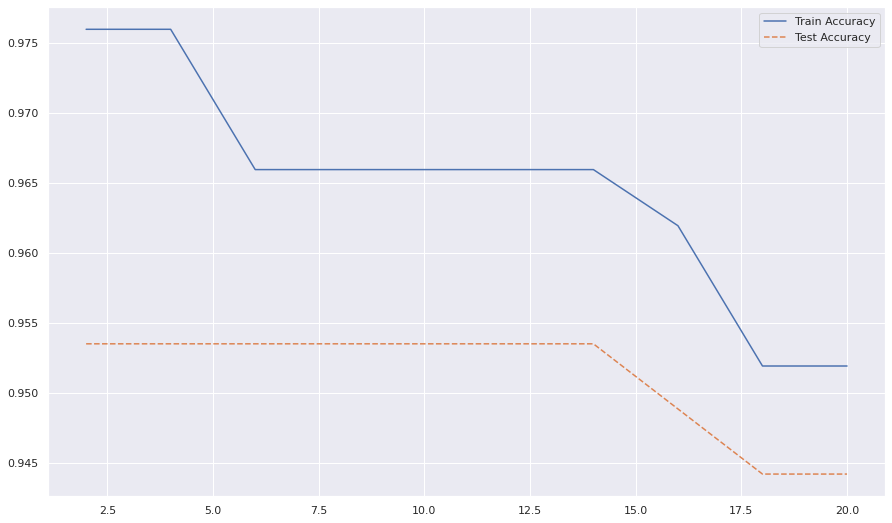

In [202]:
# 모델 정확도 그래프 확인 

plt.plot(para_leaf, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle ="--", label = "Test Accuracy")
plt.legend()

#=> 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소
#=> train, test 데이터의 성능 변화를 고려하여 14 선택 

In [206]:
#최종모델
tree_final = DTC(random_state = 1234, max_depth = 3,min_samples_split=20, min_samples_leaf=14)
tree_final.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=14, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [208]:
#변수명 저장
v_feature_name = x_train.columns 

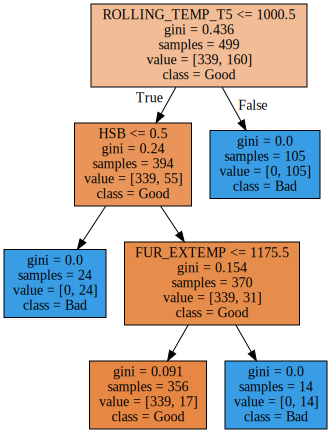

In [207]:
# tree_final.dot으로 결과 저장 (목표변수 0: good , 1 : bad)
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good", "Bad"],feature_names = v_feature_name, impurity = True, filled= True)

# graphviz 를 이용해 트리 모델 시각화 
with open("tree_final.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
# => ROLLING_TEMP_T5(압연온도)가 1000.5 도 보다 높은 경우, HBS를 적용하지 않은 경우, FUR_EXTEMP(추출온도) 가 1175.5 보다 높은 경우 불량 발생 

In [211]:
# 최종 모델 평가 

y_pred = tree_final.predict(x_test)
print("Train Accuracy: {0:.3f}\n".format(tree_final.score(x_train,y_train)), end ="")
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(x_test,y_test)))

Train Accuracy: 0.966
Test Accuracy: 0.953



In [210]:
print("Confusion matrix56: \n{}".format(confusion_matrix(y_test,y_pred)))

# => 정분류율 95.35%

Confusion matrix56: 
[[144   0]
 [ 10  61]]


In [214]:
# 결론도출
#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance5 = df_importance[:5]
df_importance5.round(4)

,Feature,Importance
10,ROLLING_TEMP_T5,0.6634
11,HSB,0.2045
9,FUR_EXTEMP,0.1320
0,PT_THK,0.0000
16,STEEL_KIND_T0,0.0000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Variable')

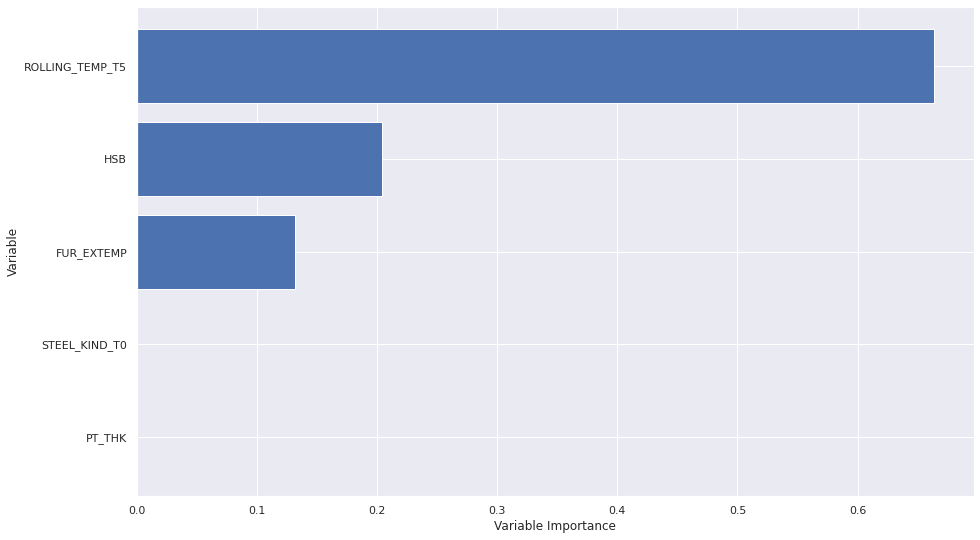

In [215]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림

df_importance5.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance5))
plt.barh(y= coordinates, width =df_importance5["Importance"])
plt.yticks(coordinates, df_importance5["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

In [216]:
# => ROLLING_TEMP_T5(압연온도), HBS적용 유무, FUR_EXTEMP(추출온도) 순으로 중요함 

### 모델링 
2. 랜덤 포레스트

In [217]:
# 모델 생성
from sklearn.ensemble import RandomForestClassifier

rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(x_train, y_train)

print("Accuracy on training set:{:.3f}".format(rf_uncustomized.score(x_train, y_train)))
print("Accuracy on test set:{:.3f}".format(rf_uncustomized.score(x_train, y_train)))

Accuracy on training set:1.000
Accuracy on val set:1.000


In [220]:
# 모델 parameter 조정 
# n_estimators 트리수 변경에 따른 모델 성능

# train, test 정확도 결과 저장 
train_accuracy = [] 
test_accuracy = []
# n_estimatos : 트리수 변경 : 1 ~ 150 
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]
 
for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state=1234, n_estimators = v_n_estimators)
    rf.fit(x_train, y_train)
    train_accuracy.append(rf.score(x_train, y_train))
    test_accuracy.append(rf.score(x_test, y_test))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

# 모델 정확도 확인 
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.998,0.916
1,20,0.998,0.949
2,30,0.998,0.953
3,40,1.000,0.958
4,50,0.998,0.958
5,60,1.000,0.958
6,70,1.000,0.958
7,80,1.000,0.953
8,90,1.000,0.949
9,100,1.000,0.949


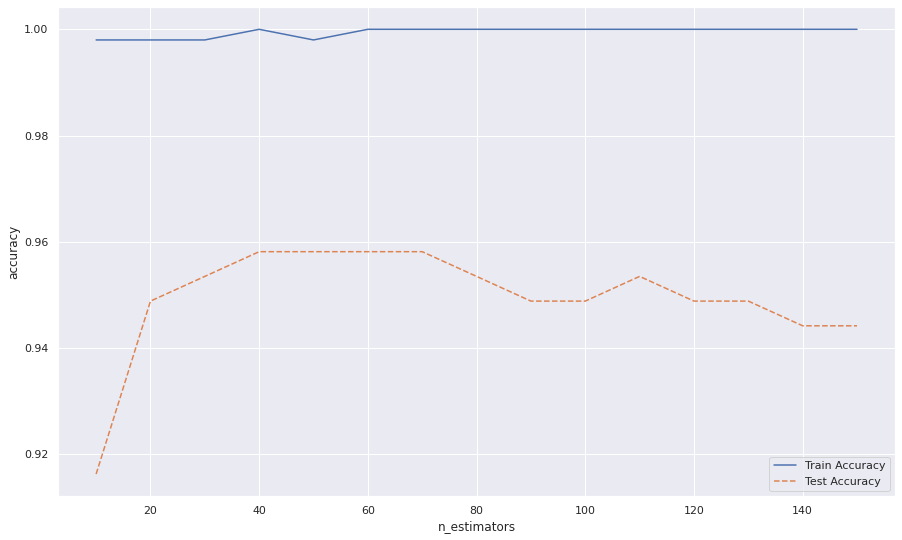

In [221]:
# 트리수 변경에 따른 정확도 변화 그래프로 확인
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel('n_estimators');plt.ylabel('accuracy')
plt.legend()

#=> 적정한 트리수를 찾지 못했을 경우 obb error 를 이용한 적정 나무 확인 가능  

In [222]:
#error 저장 리스트
oob_error = []

for v_n_estimator in range(1,151):
    rf=RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state=1234)
    rf.fit(x_train, y_train)
    oob_error.append(1 - rf.oob_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Text(0.5, 0, 'n_estimators')

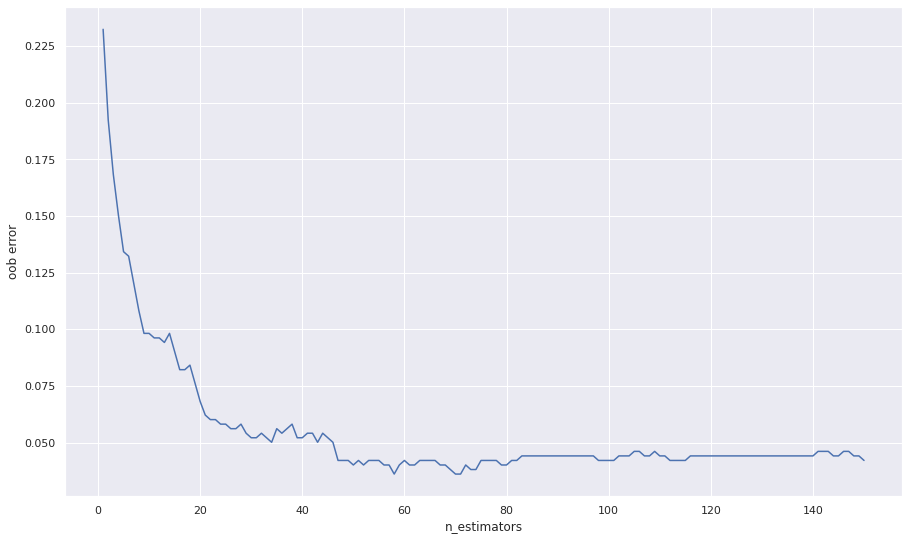

In [223]:
# 트리수 변경에 따른 obb_error 변화 그래프 생성 

plt.plot(range(1,151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

#=> 트리수 증가에 따라 obb error는 감소한다. 
# => 모델의 특성을 고려하여 트리 수 지정 n_estimators = 58 로 지정 

In [227]:
# 모델 parameter 조정
# max_depth : 최대 깊이 변경에 따른 모델 성능

# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# max_depth : 최대 깊이 값 변경 리스트 생성 
para_depth = [depth for depth in range(1,30)]
 
for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 58, max_depth = v_max_depth)
    rf.fit(x_train, y_train)
    train_accuracy.append(rf.score(x_train, y_train))
    test_accuracy.append(rf.score(x_test, y_test))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.683,0.670
1,2,0.902,0.879
2,3,0.930,0.888
3,4,0.936,0.912
4,5,0.966,0.940
5,6,0.976,0.940
6,7,0.982,0.949
7,8,0.992,0.953
8,9,0.998,0.953
9,10,0.998,0.949


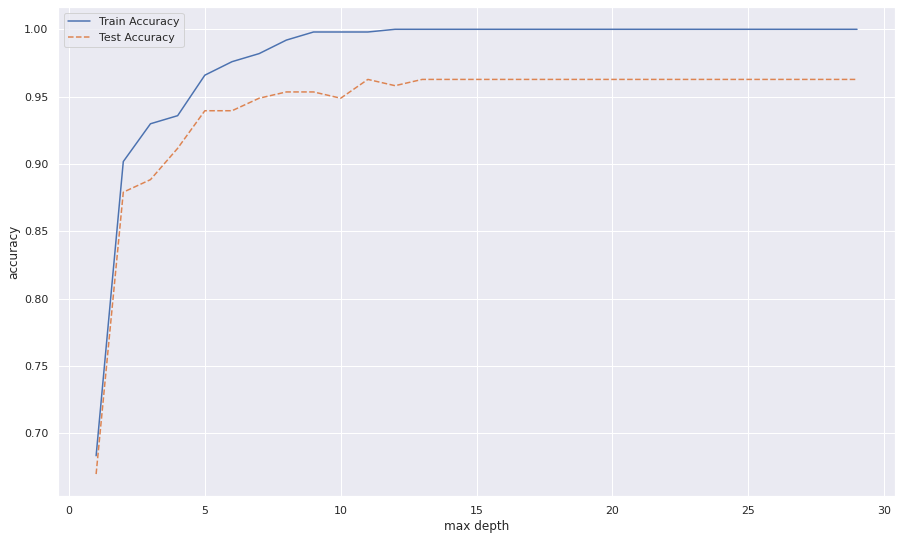

In [228]:
# max_depth 에 따른 모델 정확도 그래프 확인

plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel('max depth'); plt.ylabel('accuracy')
plt.legend()

# => 모델 최대 깊이가 증가함에 따라 모델의 정확도도 증가 
# => 모델의 특성을 고려하여 최대 깊이 max_depth = 12 지정

In [229]:
# 모델 parameter 조정
# min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

# train, test 정확도 저장용
train_accuracy = []
test_accuracy = []
# min_samples_split 값 변경 리스트 생성 
para_split = [n_split * 10 for n_split in range(1,11)]
 
for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 12, n_estimators= 58, random_state=1234)
    rf.fit(x_train,y_train)
    train_accuracy.append(rf.score(x_train,y_train))
    test_accuracy.append(rf.score(x_test,y_test))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuacy"] = train_accuracy
df_accuracy_split["TestAccuacy"] = test_accuracy

# 모델 정확도 확인 
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuacy,TestAccuacy
0,10,0.994,0.949
1,20,0.980,0.944
2,30,0.976,0.949
3,40,0.968,0.944
4,50,0.966,0.935
5,60,0.964,0.926
6,70,0.958,0.912
7,80,0.956,0.912
8,90,0.950,0.912
9,100,0.954,0.916


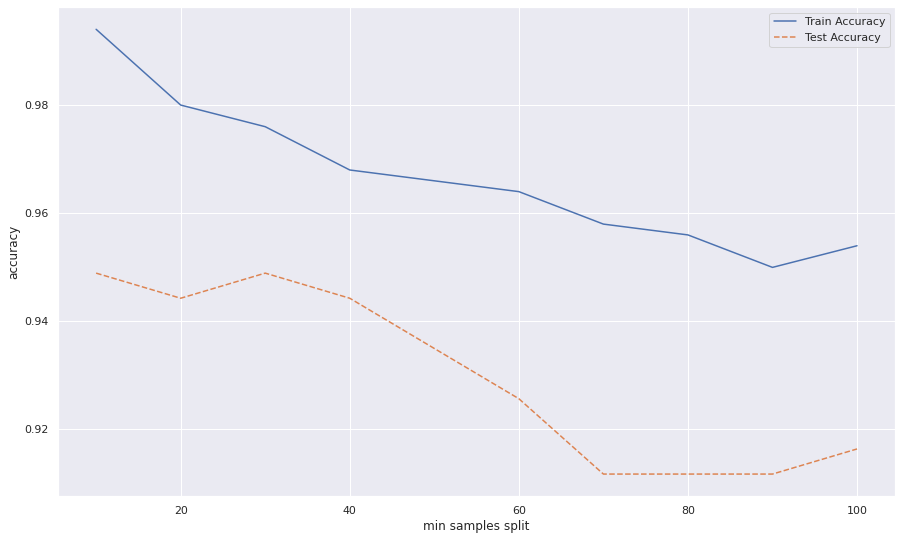

In [230]:
# min_samples_split 변화에 따른 정확도 그래프

plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel('min samples split'); plt.ylabel('accuracy')
plt.legend()

# => 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하는 추세를 보임
# =>  모델의 특성을 고려하여 min_samples_split=30 지정

In [232]:
# 모델 parameter 조정
# min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능 

# train 및 test 정확도 저장용
train_accuracy = []
test_accuracy = []
# min_samples_leaf 값 변경 리스트 생성 
para_leaf = [n_leaf for n_leaf in range(1,11)]
 
for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split=30, max_depth = 12, n_estimators = 58, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(x_train, y_train))
    test_accuracy.append(rf.score(x_test, y_test))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

#모델 정확도 확인 
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,0.928,0.893
1,2,0.906,0.888
2,3,0.902,0.888
3,4,0.898,0.884
4,5,0.892,0.884
5,6,0.892,0.884
6,7,0.892,0.884
7,8,0.892,0.884
8,9,0.886,0.879
9,10,0.886,0.879


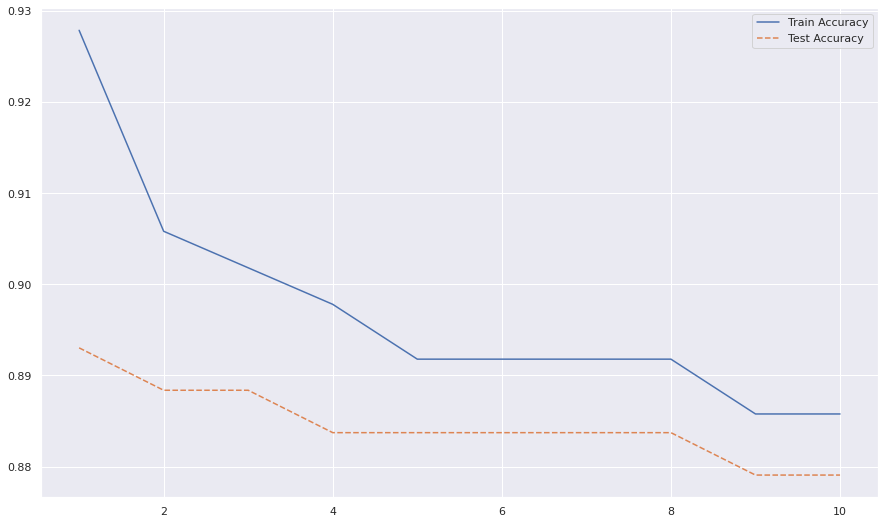

In [233]:
# min_samples_leaf 변화에 따른 정확도 그래프

plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

# => 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소
# => train, test 데이터의 성능 변화를 고려하여 min_samples_leaf = 5 지정 

In [240]:
#결론 도출

#최종 모델 
rf_final = RandomForestClassifier(min_samples_leaf = 5,min_samples_split=30, max_depth = 12, n_estimators = 58, random_state=1234)
rf_final.fit(x_train, y_train)

#평가
y_pred = rf_final.predict(x_test)

#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(rf_final.score(x_train, y_train)))
#train 데이터 셋 정확도
print("Accuracy:on test set:{:.3f}\n".format(rf_final.score(x_test, y_test)))

Accuracy on training set:0.956
Accuracy:on test set:0.907



In [241]:
#confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

#=> 정분류률 90.7%

Confusion matrix:
[[144   0]
 [ 20  51]]


In [235]:
# 변수명 지정 
v_feature_name = x_train.columns

#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance10 = df_importance[:10]
df_importance10.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.401
9,FUR_EXTEMP,0.101
11,HSB,0.086
1,PT_WDTH,0.070
0,PT_THK,0.064
2,PT_LTH,0.047
13,STEEL_KIND_C0,0.044
5,FUR_HZ_TEMP,0.042
12,ROLLING_DESCALING,0.037
7,FUR_SZ_TIME,0.028


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'columns')

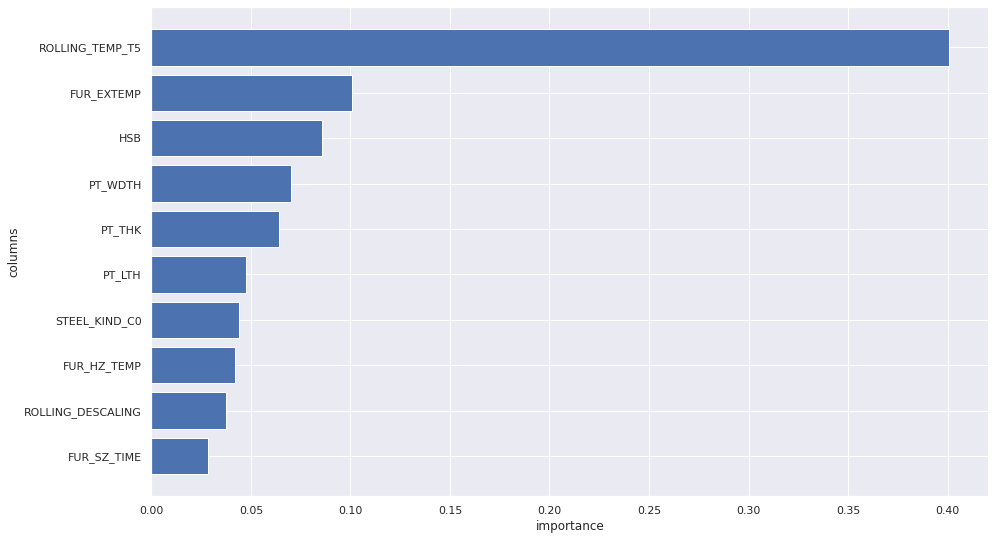

In [237]:
#설명변수 중요도 그래프 그리기
#중요도가 높은 변수를 상위에 그림
df_importance10.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance10))
plt.barh(y = coordinates, width = df_importance10["Importance"])
plt.yticks(coordinates, df_importance10["Feature"])
plt.xlabel("importance")
plt.ylabel("columns")

### 결론

In [ ]:
# => ROLLING_TEMP_T5(압연온도), FUR_EXTEMP(추출온도),HBS적용 유무 순으로 중요함 
# => 의사결정나무로 모델을 형성했을때와 상위 3개의 변수가 같음
#=> 데이터 전처리 단계에서 히스토그램으로 확인 할 수 있었던 것과 같이 압연온도가 1000.5 도 보다 높은 경우와 
#   추출온도가 1175.5 보다 높은 경우 100% scale불량이 발생하기에 각별히 주의가 필요하며,
#   HBS 또한 적용하여 불량률을 낮추는 것이 중요함  